# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 23.2MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('/content/Traffic Data.csv' , parse_dates=['date_time'], index_col=['date_time'])
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [4]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear
2018-02-12 15:00:00,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds
2018-05-31 18:00:00,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

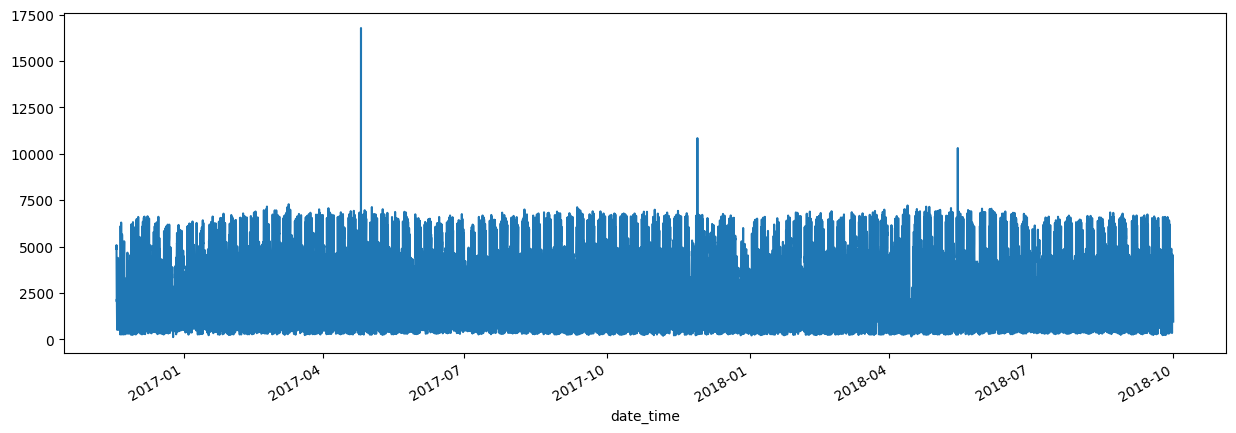

In [7]:
#Plot the time series data.
df['traffic_volume'].plot(figsize=(15,5))
plt.show()

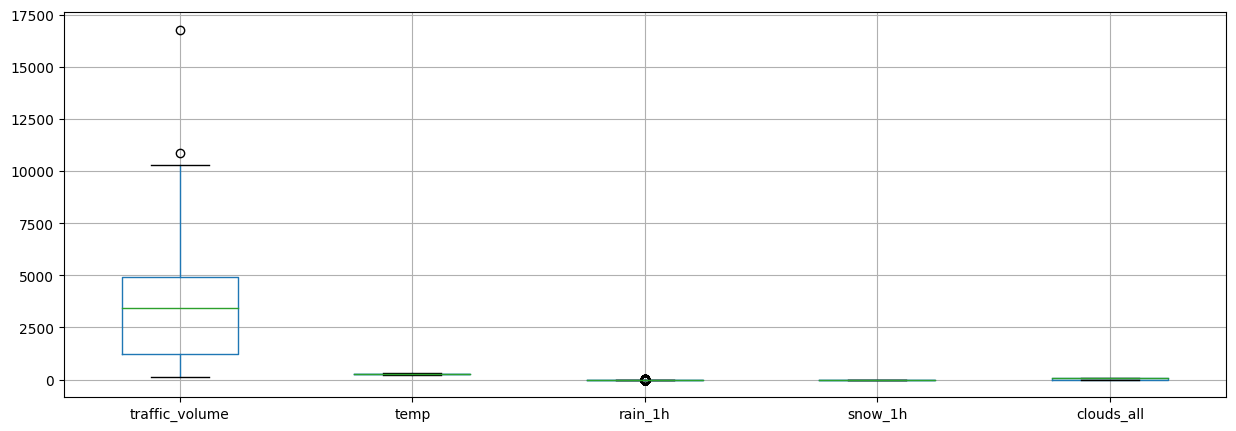

In [9]:
#Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
df.boxplot(figsize=(15,5))
plt.show()

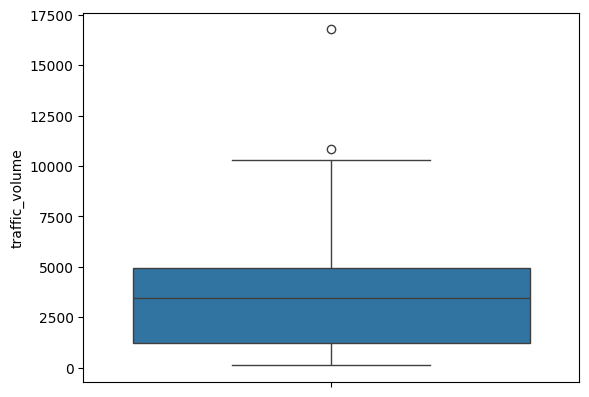

In [10]:
sns.boxplot(df['traffic_volume'])
plt.show()

In [11]:
#Remove outlier
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

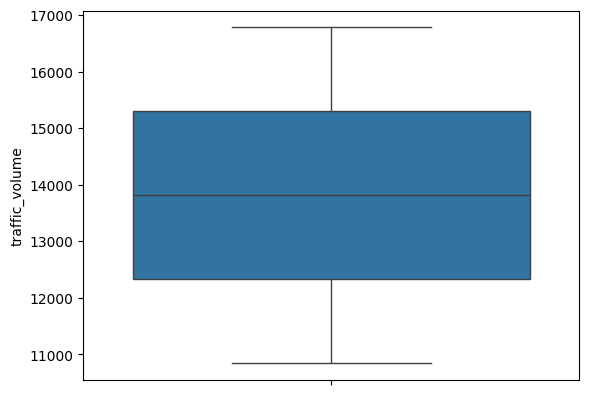

In [12]:
sns.boxplot(df[(df['traffic_volume'] < lower_bound) | (df['traffic_volume'] > upper_bound)]['traffic_volume'])
plt.show()

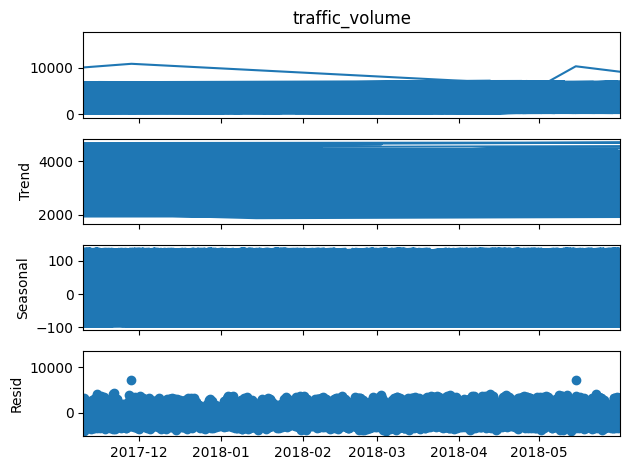

In [22]:
#Seasonal Decomposition
decomposition = seasonal_decompose(df['traffic_volume'], model='additive', period=24)
decomposition.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [14]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [15]:
df['traffic_volume'] = df['traffic_volume'].ffill()

In [16]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [17]:
df.duplicated().sum()

18

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
#Create any additional features needed, such as lags or moving averages.
df['lag_1'] = df['traffic_volume'].shift(1)
df['lag_2'] = df['traffic_volume'].shift(2)
df['lag_3'] = df['traffic_volume'].shift(3)
df.dropna(inplace=True)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3
date_time,,,,,,,,,,
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,1248.0,1209.0
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,4602.0,1248.0
2018-06-09 12:00:00,4257.0,293.66,0.0,0.0,75,Rain,moderate rain,5794.0,2838.0,4602.0
2018-07-26 19:00:00,3707.0,292.75,0.0,0.0,40,Rain,proximity shower rain,4257.0,5794.0,2838.0
2018-08-03 15:00:00,5646.0,299.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,3707.0,4257.0,5794.0


In [28]:
#Make sure that the dates are sorted correctly.
df.sort_index(inplace=True)
print(df.head())
print(df.tail())

                     traffic_volume    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   

                    weather_main weather_description   lag_1   lag_2   lag_3  
date_time                                                                     
2016-11-18 15:00:00          Fog                 fog  3253.0  2716.0   785.0  
2016-11-18 15:00:00         Snow          heavy snow  3403.0  3893.0  5991.0  
2016-11-18 15:00:00         Mist                mist  6038.0   316.0  6098.0  
2016-11-18 16:00:00         Snow          heavy snow   775.0  291

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [29]:
#shift method
df['prev_traffic_volume'] = df['traffic_volume'].shift(24)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3,prev_traffic_volume
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,3253.0,2716.0,785.0,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,3403.0,3893.0,5991.0,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,6038.0,316.0,6098.0,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,775.0,2915.0,5814.0,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,2453.0,6234.0,5179.0,NaN


In [30]:
df['prev_traffic_volume'].ffill()
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3,prev_traffic_volume
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,3253.0,2716.0,785.0,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,3403.0,3893.0,5991.0,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,6038.0,316.0,6098.0,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,775.0,2915.0,5814.0,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,2453.0,6234.0,5179.0,NaN


In [32]:
#Difference between traffic_volume
df['traffic_volume_differ'] = df['traffic_volume'].diff()
df.dropna(inplace=True)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3,prev_traffic_volume,traffic_volume_differ
date_time,,,,,,,,,,,,
2016-11-19 05:00:00,910.0,272.28,0.0,0.0,90,Clouds,overcast clouds,2043.0,5964.0,1435.0,4872.0,348.0
2016-11-19 06:00:00,1442.0,272.09,0.0,0.0,90,Clouds,overcast clouds,785.0,4480.0,729.0,4872.0,532.0
2016-11-19 07:00:00,2173.0,271.53,0.0,0.0,90,Snow,light snow,5355.0,1511.0,1035.0,5074.0,731.0
2016-11-19 08:00:00,3112.0,271.49,0.0,0.0,40,Snow,light snow,356.0,3631.0,274.0,5074.0,939.0
2016-11-19 09:00:00,3500.0,270.90,0.0,0.0,90,Snow,light snow,901.0,5941.0,3093.0,5074.0,388.0


In [33]:
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear
df['hour'] = df.index.hour
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [34]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3,prev_traffic_volume,traffic_volume_differ,day_of_week,month,day_of_year,hour,is_weekend
date_time,,,,,,,,,,,,,,,,,
2016-11-19 05:00:00,910.0,272.28,0.0,0.0,90,Clouds,overcast clouds,2043.0,5964.0,1435.0,4872.0,348.0,5,11,324,5,1
2016-11-19 06:00:00,1442.0,272.09,0.0,0.0,90,Clouds,overcast clouds,785.0,4480.0,729.0,4872.0,532.0,5,11,324,6,1
2016-11-19 07:00:00,2173.0,271.53,0.0,0.0,90,Snow,light snow,5355.0,1511.0,1035.0,5074.0,731.0,5,11,324,7,1
2016-11-19 08:00:00,3112.0,271.49,0.0,0.0,40,Snow,light snow,356.0,3631.0,274.0,5074.0,939.0,5,11,324,8,1
2016-11-19 09:00:00,3500.0,270.90,0.0,0.0,90,Snow,light snow,901.0,5941.0,3093.0,5074.0,388.0,5,11,324,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,4457.0,4425.0,721.0,2950.0,-404.0,6,9,273,19,1
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,519.0,2517.0,4849.0,2607.0,-762.0,6,9,273,20,1
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,6146.0,6232.0,3239.0,3856.0,-622.0,6,9,273,21,1


In [35]:
train = df.loc['2016-11-18':'2017-11-18']
val = df.loc['2017-11-19':'2018-04-30']
test = df.loc['2018-05-1':'2018-09-30']

In [36]:
train.shape , val.shape , test.shape

((10838, 17), (4626, 17), (4490, 17))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [37]:
#Feature Scaling
num_pipeline =make_pipeline( MinMaxScaler(),SimpleImputer())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'), OneHotEncoder()
)

preproc_pip=ColumnTransformer([
    ('num',num_pipeline,['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'day_of_week', 'month', 'day_of_year', 'hour', 'is_weekend']),
    ('cat',cat_pipeline,['weather_main', 'weather_description'])
])
preproc_pip

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 ['temp', 'rain_1h', 'snow_1h', 'clouds_all',
                                  'day_of_week', 'month', 'day_of_year', 'hour',
                                  'is_weekend']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['weather_main', 'weather_description'])])

In [38]:
#Applay model
train_preproc=preproc_pip.fit_transform(train)
val_preproc=preproc_pip.transform(val)
test_preproc=preproc_pip.transform(test)

In [40]:
window_size=24
train_preproc=train_preproc[window_size:,0]
val_preproc=val_preproc[window_size:,0]
test_preproc=test_preproc[window_size:,0]

In [41]:
from tensorflow.keras.utils import timeseries_dataset_from_array
train_preproc_dense = train_preproc.toarray()
val_preproc_dense = val_preproc.toarray()
test_preproc_dense = test_preproc.toarray()

train_xy= timeseries_dataset_from_array(train_preproc_dense, targets=train_preproc_dense[window_size:,0:24], sequence_length=window_size, batch_size=32)
val_xy= timeseries_dataset_from_array(val_preproc_dense, targets=val_preproc_dense[window_size:,0:24], sequence_length=window_size, batch_size=32)
test_xy= timeseries_dataset_from_array(test_preproc_dense, targets=test_preproc_dense[window_size:,0:24], sequence_length=window_size, batch_size=32)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , GRU
#Arch
model=Sequential([GRU(units=3,activation='tanh', return_sequences=True),
                  GRU(units=20,activation='tanh',return_sequences=True),
                  GRU(units=15,activation='tanh',return_sequences=True),
                  GRU(units=5,activation='tanh',return_sequences=True),

                  Dense(units=1,activation='relu')])

#compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [44]:
#fit
history= model.fit(train_xy,epochs=10,validation_data=val_xy,batch_size=32)

Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - loss: 0.0303 - mae: 0.1306 - val_loss: 0.0131 - val_mae: 0.0867
Epoch 2/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - loss: 0.0098 - mae: 0.0776 - val_loss: 0.0098 - val_mae: 0.0751
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - loss: 0.0075 - mae: 0.0687 - val_loss: 0.0081 - val_mae: 0.0685
Epoch 4/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - loss: 0.0063 - mae: 0.0625 - val_loss: 0.0072 - val_mae: 0.0642
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 0.0056 - mae: 0.0583 - val_loss: 0.0066 - val_mae: 0.0617
Epoch 6/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - loss: 0.0053 - mae: 0.0559 - val_loss: 0.0063 - val_mae: 0.0602
Epoch 7/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - loss: 0.0051 - mae: 0.0544 - val_loss: 0.0061 - val_mae: 0.0592
Epoch 8/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - loss: 0.0049 - mae: 0.0536 - val_loss: 0.0060 - val_mae: 0.0584
Epoch 9/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, None, 3)             │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, None, 20)            │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, None, 15)            │           1,665 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, None, 5)             │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, None, 1)             │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,667 (41.67 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,112 (27.79 KB)

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [46]:
X_train, y_train = next(iter(train_xy))

In [47]:
y_pred=model.predict(X_train)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


array([[[0.3917273 ],
        [0.39989772],
        [0.39507356],
        [0.39275247],
        [0.40607867],
        [0.42416593],
        [0.44702047],
        [0.45969525],
        [0.46518263],
        [0.478121  ],
        [0.48090282],
        [0.47919378],
        [0.47188708],
        [0.46651003],
        [0.46214452],
        [0.46065196],
        [0.458114  ],
        [0.45590696],
        [0.45785633],
        [0.45863566],
        [0.4586383 ],
        [0.4596961 ],
        [0.45971712],
        [0.46089858]],

       [[0.39039552],
        [0.39966944],
        [0.39360586],
        [0.40630102],
        [0.42426896],
        [0.44707173],
        [0.4597148 ],
        [0.46518016],
        [0.47811076],
        [0.48089314],
        [0.4791864 ],
        [0.47188178],
        [0.46650633],
        [0.4621419 ],
        [0.4606501 ],
        [0.45811248],
        [0.4559058 ],
        [0.45785534],
        [0.45863488],
        [0.4586378 ],
        [0.45969573],
        

In [48]:
train.head(5)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3,prev_traffic_volume,traffic_volume_differ,day_of_week,month,day_of_year,hour,is_weekend
date_time,,,,,,,,,,,,,,,,,
2016-11-19 05:00:00,910.0,272.28,0.0,0.0,90,Clouds,overcast clouds,2043.0,5964.0,1435.0,4872.0,348.0,5,11,324,5,1
2016-11-19 06:00:00,1442.0,272.09,0.0,0.0,90,Clouds,overcast clouds,785.0,4480.0,729.0,4872.0,532.0,5,11,324,6,1
2016-11-19 07:00:00,2173.0,271.53,0.0,0.0,90,Snow,light snow,5355.0,1511.0,1035.0,5074.0,731.0,5,11,324,7,1
2016-11-19 08:00:00,3112.0,271.49,0.0,0.0,40,Snow,light snow,356.0,3631.0,274.0,5074.0,939.0,5,11,324,8,1
2016-11-19 09:00:00,3500.0,270.90,0.0,0.0,90,Snow,light snow,901.0,5941.0,3093.0,5074.0,388.0,5,11,324,9,1


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [49]:
model.evaluate(val_xy)

143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mae: 0.0587


[0.005799129139631987, 0.05713631212711334]

<Axes: >

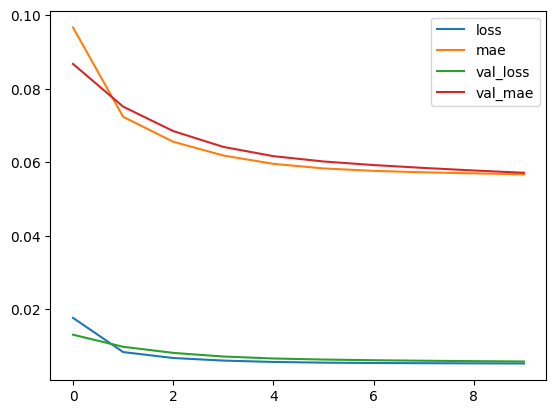

In [50]:
pd.DataFrame(history.history).plot()

In [65]:
print(f'y_train shape: {y_train.shape}')
print(f'y_pred shape: {y_pred.shape}')

y_train shape: (32, 1)
y_pred shape: (768,)


In [75]:
y_pred = y_pred.reshape(-1, 1)


In [78]:
y_pred_reduced = y_pred[:32]


In [79]:
print(f'y_train shape: {y_train.shape}')
print(f'y_pred shape: {y_pred.shape}')

y_train shape: (32, 1)
y_pred shape: (768, 1)


In [82]:
if len(y_pred) > len(y_train):
    y_pred = y_pred[:len(y_train)]
print('mean_squared_error: ', mean_squared_error(y_train, y_pred))
print('mean_absolute_error: ', mean_absolute_error(y_train, y_pred))
print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(y_train, y_pred))


mean_squared_error:  0.002627664079868486
mean_absolute_error:  0.04189912405385518
mean_absolute_percentage_error:  0.08671308820691898


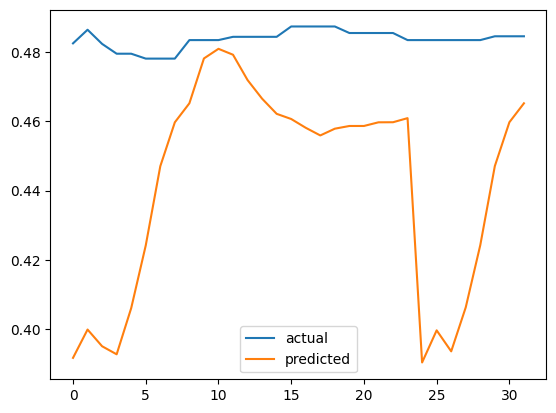

In [83]:
plt.plot(y_train, label='actual')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [69]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , SimpleRNN
#Arch
model=Sequential([SimpleRNN(units=100,activation='tanh', return_sequences=True),
                  SimpleRNN(units=50,activation='tanh',return_sequences=True),
                  SimpleRNN(units=60,activation='tanh',return_sequences=True),

                  Dense(units=1,activation='relu')])

#compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [70]:
history= model.fit(train_xy,epochs=10,validation_data=val_xy,batch_size=32)

Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.1600 - mae: 0.3467 - val_loss: 0.0575 - val_mae: 0.2092
Epoch 2/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0114 - mae: 0.0854 - val_loss: 0.0163 - val_mae: 0.0967
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0091 - mae: 0.0718 - val_loss: 0.0203 - val_mae: 0.1083
Epoch 4/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.0112 - mae: 0.0801 - val_loss: 0.0289 - val_mae: 0.1341
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0153 - mae: 0.0947 - val_loss: 0.0343 - val_mae: 0.1494
Epoch 6/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - loss: 0.0186 - mae: 0.1063 - val_loss: 0.0309 - val_mae: 0.1392
Epoch 7/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.0198 - mae: 0.1079 - val_loss: 0.0252 - val_mae: 0.1218
Epoch 8/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0184 - mae: 0.1025 - val_loss: 0.0286 - val_mae: 0.1323
Epoch 9/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [84]:
model.evaluate(val_xy)

143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0228 - mae: 0.1177


[0.020773764699697495, 0.10869324207305908]

In [85]:
if len(y_pred) > len(y_train):
    y_pred = y_pred[:len(y_train)]
print('mean_squared_error: ', mean_squared_error(y_train, y_pred))
print('mean_absolute_error: ', mean_absolute_error(y_train, y_pred))
print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(y_train, y_pred))


mean_squared_error:  0.002627664079868486
mean_absolute_error:  0.04189912405385518
mean_absolute_percentage_error:  0.08671308820691898


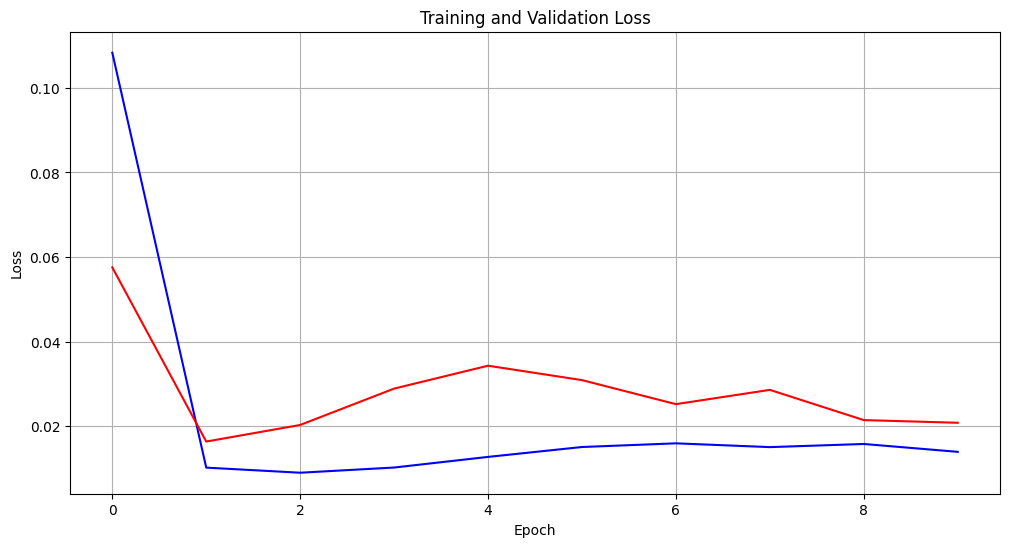

In [86]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

A1:I used ffill(Forward Filling) Technique to Handling Missing Values

A2 yes I do , I used leg fetuer to extract new fetures for previoes time also I used shift to create new column prev_traffic_volume and I used diff  in traffic_volume column to highlight short-term volume.

A3:I used to types of models GRU and RNN

A4:I used  number of epochs =10  and it is give me good resulte in lose function and optimizer is adam it is adaptive learning rate and helps my in train efficiently

